# 1.0 importing libs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from colour import Color
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patheffects as pe

# 2.0 importing and cleanning dataset

In [2]:
#data = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv")
data = pd.read_csv("gmr.csv")
data_br = data.loc[data.country_region=='Brazil'].iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()
data_br.columns=["country","state","city","date","retail","grocery","parks","transit","workplaces","residential"]
data_br.state = data_br.state.str.replace("State of ","")
data_br.date = pd.to_datetime(data_br.date)
data_br.index = data_br.date
data_br.drop(labels='date',axis=1,inplace=True)

display(data_br.head())
print(data_br.info())

/home/joao/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387242 entries, 2020-02-15 to 2020-09-11
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      387242 non-null  object 
 1   state        387032 non-null  object 
 2   city         381362 non-null  object 
 3   retail       165914 non-null  float64
 4   grocery      162695 non-null  float64
 5   parks        143691 non-null  float64
 6   transit      121330 non-null  float64
 7   workplaces   369058 non-null  float64
 8   residential  147147 non-null  float64
dtypes: float64(6), object(3)
memory usage: 29.5+ MB
None


# 3.0 Creating sub dataFrames

In [3]:
data_br_rn = data_br.loc[data_br.state=="Rio Grande do Norte"].copy()
data_br_state = data_br.loc[~data_br.state.isnull() & data_br.city.isnull()].copy()
data_br_rn_city = data_br_rn.loc[~data_br_rn.city.isnull()].copy()

# 4.0 functions

In [4]:
def getMinAndMax(serie):
    minimum = serie.loc[serie==serie.min()].tail(1)
    maximum = serie.loc[serie==serie.max()]
    return minimum.append(maximum)
def groupAndUnstack(dataframe,firstBy,secondBy):
    return dataframe.groupby(by=[firstBy,secondBy]).mean().unstack()
def plotHighlight(ax,highlight):
    highlight_min_max = getMinAndMax(highlight)
    colors = list(Color("blue").range_to(Color("cyan"),100))+list(Color("cyan").range_to(Color("yellow"),100))
    colorMap = []
    for entry in highlight:
        colorMap.append(colors[100+int(entry)].hex)
    for i in range(highlight.count()-1):
        x = (highlight.index[i],highlight.index[i+1])
        y = (highlight[i],highlight[i+1])
        ax.plot(x,y,colorMap[i],linewidth=4)
        if (x[0] in highlight_min_max) & (y[0] in highlight_min_max.unique()):
            ax.scatter(x[0],y[0],marker='o',alpha=1,color=colorMap[i],linewidth=5)
def simplePlot(ax,lines):
    lines.plot(ax=ax,color='grey',linewidth=2,alpha=0.4,legend=False)

# 5.0 Plotting data

In [62]:
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<ipython-input-63-d308aa55c45e>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","Março","Abril","Maio","Junho","Julho","Agosto","Setembro"],fontsize=12)


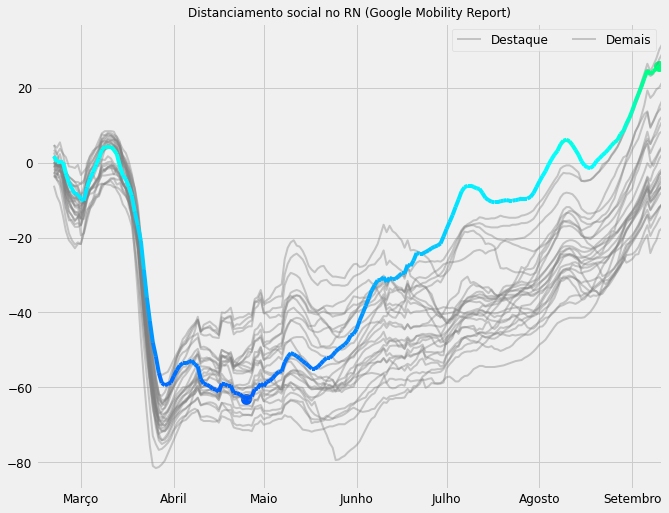

In [63]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(10,8))

item='retail'
highlight_state = 'Amazonas'
#get state lines
lines = groupAndUnstack(data_br_state,data_br_state.index,"state")[item].rolling(window=7).mean()
highlight = groupAndUnstack(data_br_state,data_br_state.index,"state")[item][highlight_state].fillna(method='ffill').rolling(window=7).mean()[6:].copy()

#plot lines
simplePlot(ax,lines)
plotHighlight(ax,highlight)

handles,labels = ax.get_legend_handles_labels()
labels = ["Destaque","Demais"]
ax.legend(handles,labels,ncol=2,fontsize=12)

ax.set_xticklabels(["","Março","Abril","Maio","Junho","Julho","Agosto","Setembro"],fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_title("Distanciamento social no RN (Google Mobility Report)",fontsize=12)
ax.set_xlabel("")

#plt.savefig("MovingAverageFigure.png",dpi=300)
plt.show()

<ipython-input-82-648da0322135>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(labels)
<ipython-input-82-648da0322135>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(labels)
<ipython-input-82-648da0322135>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(labels)
<ipython-input-82-648da0322135>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(labels)
<ipython-input-82-648da0322135>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(labels)
<ipython-input-82-648da0322135>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(labels)
<ipython-input-82-648da0322135>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].se

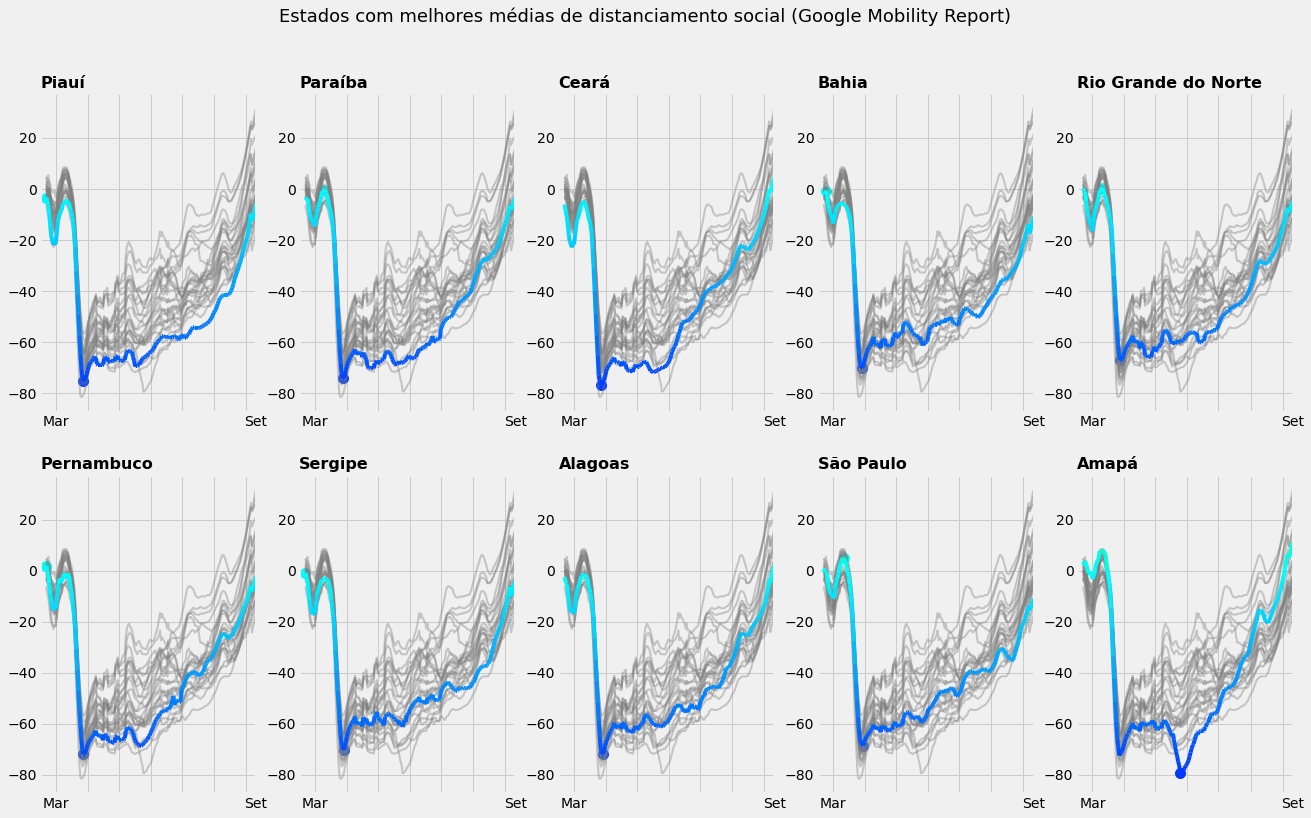

In [82]:
lines=2
cols=5
size=lines*cols

fig,ax = plt.subplots(nrows=lines,ncols=cols,figsize=(cols*4,lines*6))
top_states = groupAndUnstack(data_br_state,data_br_state.index,"state")[item].rolling(window=7).mean().mean().sort_values().head(size)
fig.suptitle('Estados com melhores médias de distanciamento social (Google Mobility Report)', fontsize=18)
item='retail'
highlight_state = 'Rio Grande do Norte'

for i in range(lines):
    for j in range(cols):
        state = top_states.index[i*cols+j]
        
        lines = groupAndUnstack(data_br_state,data_br_state.index,"state")[item].rolling(window=7).mean()
        highlight = groupAndUnstack(data_br_state,data_br_state.index,"state")[item][state].fillna(method='ffill').rolling(window=7).mean()[6:].copy()

        simplePlot(ax[i][j],lines)
        plotHighlight(ax[i][j],highlight)
        
        ax[i][j].set_title(state,fontsize=16,loc='left',fontweight='bold')
        ax[i][j].set_xlabel("")
        labels = ["" for item in ax[i][j].get_xticklabels()]
        labels[1]="Mar"
        labels[len(labels)-1]="Set"
        ax[i][j].set_xticklabels(labels)

#ax[i].yaxis.set_tick_params(labelsize=12)
#plt.savefig("MovingAverageFigure.png",dpi=300)
plt.show()